In [31]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction and Data Cleaning

In [2]:
health_indicator = os.path.join("Resources", "diabetes_binary_health_indicators_BRFSS2015.csv")
health_indicator_df = pd.read_csv(health_indicator)
health_indicator_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
health_indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
health_indicator_df = health_indicator_df.astype(int)

In [5]:
health_indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [6]:
health_indicator_na = health_indicator_df.dropna(how = "any")
health_indicator_na.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [7]:
health_indicator_cleaned = health_indicator_na.drop_duplicates(subset = health_indicator_na.columns, keep = False)
health_indicator_cleaned.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [8]:
health_indicator_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218105 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       218105 non-null  int32
 1   HighBP                218105 non-null  int32
 2   HighChol              218105 non-null  int32
 3   CholCheck             218105 non-null  int32
 4   BMI                   218105 non-null  int32
 5   Smoker                218105 non-null  int32
 6   Stroke                218105 non-null  int32
 7   HeartDiseaseorAttack  218105 non-null  int32
 8   PhysActivity          218105 non-null  int32
 9   Fruits                218105 non-null  int32
 10  Veggies               218105 non-null  int32
 11  HvyAlcoholConsump     218105 non-null  int32
 12  AnyHealthcare         218105 non-null  int32
 13  NoDocbcCost           218105 non-null  int32
 14  GenHlth               218105 non-null  int32
 15  MentHlth              218105 non-n

In [9]:
diabetes_health_indicator = health_indicator_cleaned.reset_index(drop = True)
diabetes_health_indicator.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


# Data Analysis

In [10]:
diabetes_health_indicator.describe().applymap('{:,.2f}'.format)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,"218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00",...,"218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00","218,105.00"
mean,0.16,0.46,0.45,0.96,28.82,0.47,0.05,0.11,0.72,0.60,...,0.94,0.10,2.64,3.68,4.92,0.20,0.44,8.10,4.95,5.81
std,0.37,0.50,0.50,0.20,6.89,0.50,0.21,0.31,0.45,0.49,...,0.23,0.30,1.07,7.87,9.22,0.40,0.50,3.11,1.00,2.10
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,4.00
50%,0.00,0.00,0.00,1.00,28.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,0.00,0.00,0.00,0.00,8.00,5.00,6.00
75%,0.00,1.00,1.00,1.00,32.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,3.00,4.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [11]:
print(diabetes_health_indicator['Diabetes_binary'].value_counts())

0    183238
1     34867
Name: Diabetes_binary, dtype: int64


In [12]:
print(diabetes_health_indicator['Diabetes_binary'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

0    84.01%
1    15.99%
Name: Diabetes_binary, dtype: object


#### From the dataset, the percentage of people having Diabetics is 16%. This indicates an imbalanced dataset.

In [40]:
diabetes_df = diabetes_health_indicator[diabetes_health_indicator['Diabetes_binary'] == 1]
non_diabetes_df = diabetes_health_indicator[diabetes_health_indicator['Diabetes_binary'] == 0]

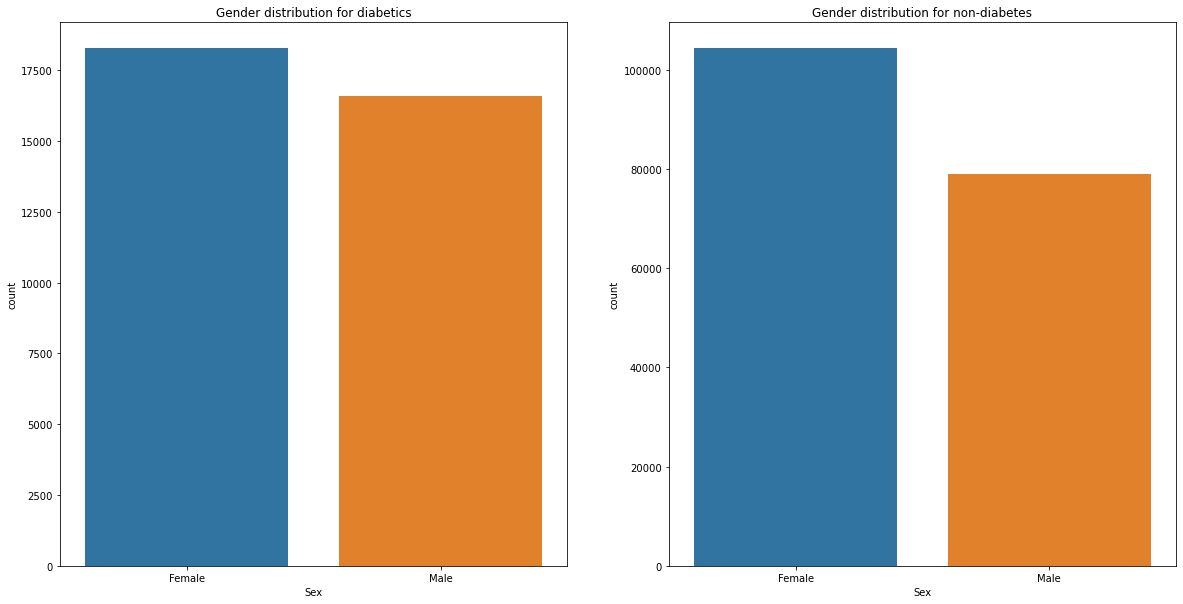

In [65]:
# gender distribution 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1 = sns.countplot(data = diabetes_df, x = 'Sex', ax = ax1)
ax1.set(title = 'Gender distribution for diabetics')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data = non_diabetes_df, x = 'Sex', ax = ax2)
ax2.set(title = 'Gender distribution for non-diabetes')
ax2.set_xticklabels(['Female', 'Male'])

plt.show()

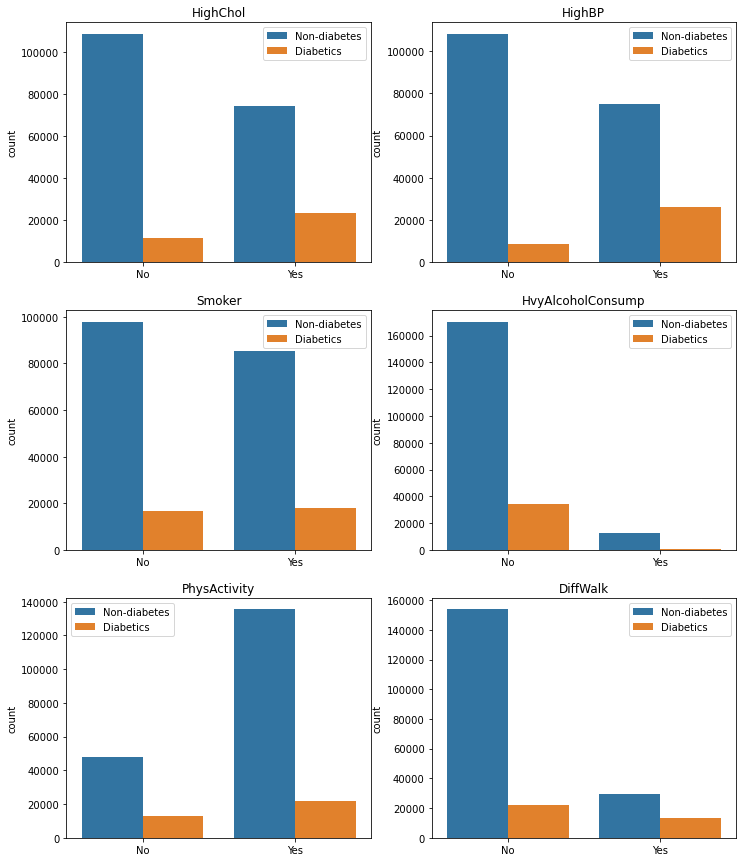

In [50]:
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3 #number of rows
b = 2 #number of columns
c = 1 #plot counter

fig = plt.figure(figsize = (12,15))
for i in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data = diabetes_health_indicator, x = i, hue = 'Diabetes_binary')
    ax.set(title = '{}'.format(i))
    ax.set(xlabel = None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['Non-diabetes', 'Diabetics'])
    c = c + 1

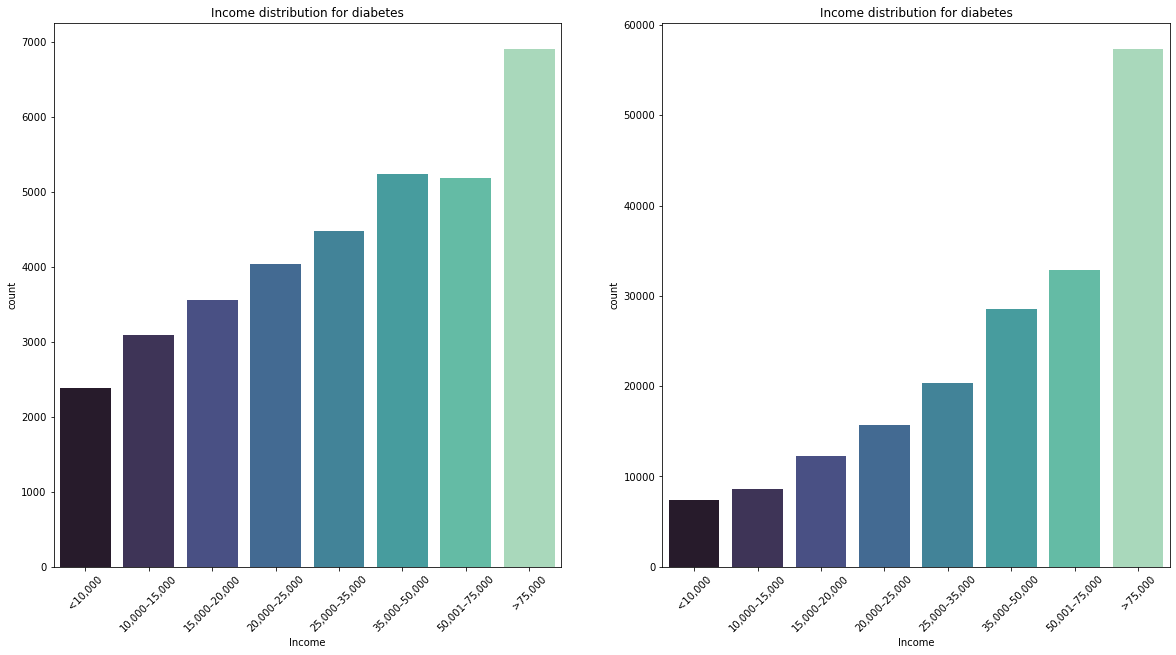

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1 = sns.countplot(data = diabetes_df, x = 'Income', palette = 'mako', ax = ax1)
ax1.set(title= 'Income distribution for diabetes')
ax1.set_xticklabels(['<10,000', '10,000–15,000', '15,000–20,000', 
                 '20,000–25,000', '25,000–35,000', '35,000–50,000', 
                 '50,001–75,000', '>75,000'], rotation = 45)

ax2 = sns.countplot(data = non_diabetes_df, x = 'Income', palette = 'mako', ax = ax2)
ax2.set(title= 'Income distribution for non-diabetes')
ax2.set_xticklabels(['<10,000', '10,000–15,000', '15,000–20,000', 
                 '20,000–25,000', '25,000–35,000', '35,000–50,000', 
                 '50,001–75,000', '>75,000'], rotation = 45)

plt.show()

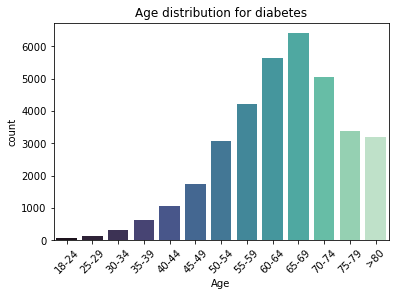

In [70]:
ax = sns.countplot(data = diabetes_df, x = 'Age', palette = 'mako')
ax.set(title = 'Age distribution for diabetes')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', 
                    '40-44', '45-49', '50-54', '55-59', 
                    '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)
plt.show()

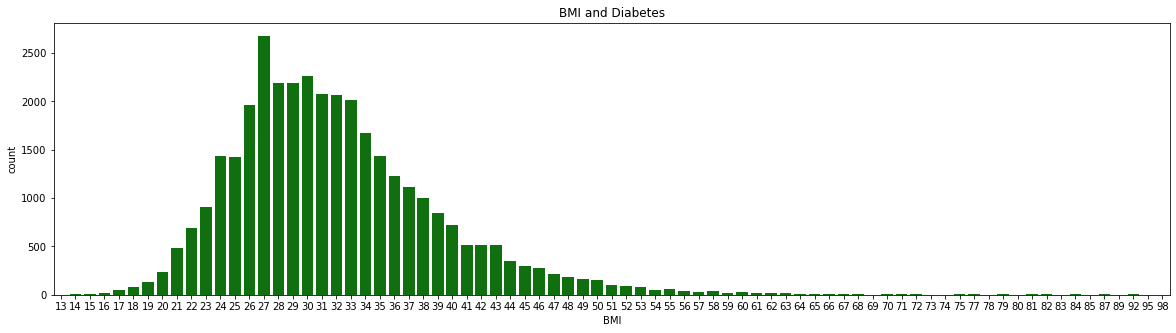

In [89]:
# BMI 

plt.figure(figsize = (20,5))

sns.countplot(data = diabetes_df, x = 'BMI', color="g", label = "Diabetes")
plt.title("BMI and Diabetes")

plt.show()